In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("bug_data.csv")
df.head()

,id,description,severity
0,91,document properties cannot be listed,major
1,103,layout bug: table cell overflows containing cell,normal
2,104,table saved as text: missing inter-column space,minor
3,105,nested <TABLE>s: bgcolor of inner table not re...,normal
4,133,Navigator draws entities like &lt;&amp;&gt; as...,minor


In [3]:
df.shape
df.dtypes
df['description'] = df['description'].astype('str')

In [4]:
#remove null values
df = df.dropna()
df.dtypes

id              int64
description    object
severity       object
dtype: object

In [5]:
df.severity.value_counts()

normal         272522
major           35899
critical        31953
enhancement     23424
minor           19451
trivial          7716
blocker          3694
Name: severity, dtype: int64

In [6]:
df['severity_num'] = df.severity.map({'minor':0,'normal':1,'major':2,'critical':3,'blocker':4,'trivial' : 5, 'enhancement' : 6})
# df['severity_num'] = df.severity.map({'minor':0,'normal':1,'major':2,'critical':3,'blocker':4})

# df['severity_num'] = df.severity.map({'minor':0,'normal':1,'major':2,'critical':3})



In [7]:
#df = df.sort_values(by='severity_num')
df.head(10)


,id,description,severity,severity_num
0,91,document properties cannot be listed,major,2
1,103,layout bug: table cell overflows containing cell,normal,1
2,104,table saved as text: missing inter-column space,minor,0
3,105,nested <TABLE>s: bgcolor of inner table not re...,normal,1
4,133,Navigator draws entities like &lt;&amp;&gt; as...,minor,0
5,134,Navigator crashes w/ javascript setting textar...,critical,3
6,159,warning fix : ns/js/jsj/jsStubs.c,trivial,5
7,174,Failed assert on exit at mkgeturl.c:5855 (net_...,minor,0
8,213,"showDocument(""javascript:...""); broken",major,2
9,220,Incorrect display of CP-1250 pages in Unix ver...,normal,1


In [8]:
df_normal = df[df.severity_num==1]
df_major = df[df.severity_num==2]
df_critical = df[df.severity_num==3]
df_minor = df[df.severity_num==0]
df_blocker = df[df.severity_num==4]
# df_trivial = df[df.severity_num==5]
# df_enhancement = df[df.severity_num==6]

In [9]:
from sklearn.utils import resample
def resample_df(df):
    return resample(df,replace=True,n_samples=272522,random_state=1)


df_major = resample_df(df_major)
df_critical = resample_df(df_critical)
df_minor = resample_df(df_minor)
df_blocker = resample_df(df_blocker)
# df_trivial = resample_df(df_trivial)
# df_enhancement = resample_df(df_enhancement)

# df = pd.concat([df_normal,df_major,df_critical,df_minor,df_blocker,df_trivial,df_enhancement])
df = pd.concat([df_normal,df_major,df_critical,df_minor,df_blocker])


df.severity.value_counts()


normal      272522
major       272522
critical    272522
minor       272522
blocker     272522
Name: severity, dtype: int64

In [10]:
#define x as bug description and y as the severity
x = df.description
y = df.severity_num
print(x)
print(y)

1          layout bug: table cell overflows containing cell
3         nested <TABLE>s: bgcolor of inner table not re...
9         Incorrect display of CP-1250 pages in Unix ver...
13            Fails to complie due to  having wrong include
21           Missing "&" in parameter, cmd/xfe/forms.c:2116
                                ...                        
42355            mfcembed causes IPF in module WEBBRWSR.DLL
19325     won't build from src on Solaris 2.5.1, gcc 2.9...
134469                            Eats up a loads of memory
53575                             problem with installation
91574     the text entry box cannot be selected and text...
Name: description, Length: 1362610, dtype: object
1         1
3         1
9         1
13        1
21        1
         ..
42355     4
19325     4
134469    4
53575     4
91574     4
Name: severity_num, Length: 1362610, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)


In [12]:
#instantiate the vectorizer
vect = CountVectorizer()

In [13]:
vect.fit(x_train)
x_train_dtm = vect.transform(x_train)
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)

In [14]:
x_test_dtm = vect.transform(x_test)
x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

In [15]:
dt = DecisionTreeClassifier(max_depth=50)
%time dt.fit(x_train_tfidf,y_train)

CPU times: user 5min 19s, sys: 415 ms, total: 5min 19s
Wall time: 1h 54min 57s


DecisionTreeClassifier(max_depth=50)

In [16]:
y_pred = dt.predict(x_test_tfidf)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.5402257695780386

In [17]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[45641, 31856, 11303,   650,   305],
       [25457, 42977, 14257,  4773,  1896],
       [22236, 30217, 32843,  4070,   871],
       [ 6300, 13820,  7720, 61124,   908],
       [ 5824, 20005,  3843,   432, 60334]])

In [18]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['minor','normal','major','critical','blocker'])
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['normal','minor','major','critical'])

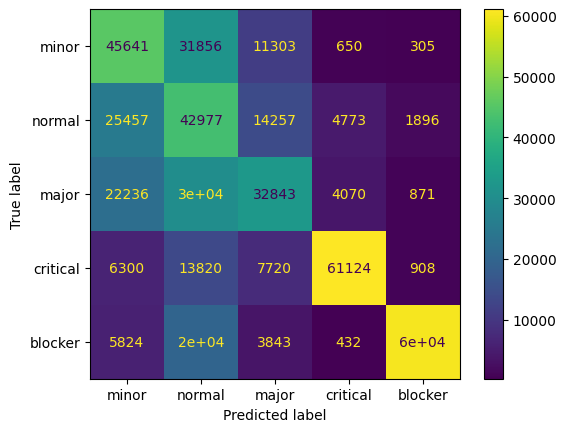

In [19]:
cm_display.plot()
plt.show()
